# Import data

In [1]:
import pandas as pd
%matplotlib inline

data = pd.read_csv('cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [2]:
"""
- userid: a unique number that identifies each player.
- version: whether the player was put in in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
- sum_gamerounds: the number of game rounds played by the player during the first 14 days after install.
- retention_1 - did the player come back and play 1 day after installing?
- retention_7 - did the player come back and play 7 days after installing?
"""

'\n- userid: a unique number that identifies each player.\n- version: whether the player was put in in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).\n- sum_gamerounds: the number of game rounds played by the player during the first 14 days after install.\n- retention_1 - did the player come back and play 1 day after installing?\n- retention_7 - did the player come back and play 7 days after installing?\n'

# 1-day retention by A/B group

In [3]:
# counting the number of players in each A/B group
num_AB = data.groupby('version')['userid'].count()
num_AB

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

In [4]:
# The % of users that came back the day after they installed
percentage_1d = data['retention_1'].mean()
percentage_1d 

0.4452095044850259

In [5]:
# How 1-day retention differs between the two AB groups
percentage_1d_AB = data.groupby('version')['retention_1'].mean()
percentage_1d_AB

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

## Should we be confident in the differences between A/B groups? 

In [16]:
# Create a lsit with bootstraped means for AB groups
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
boot_1d = pd.DataFrame(boot_1d)
boot_1d.head()

version,gate_30,gate_40
retention_1,0.445628,0.440821
retention_1,0.444903,0.436129
retention_1,0.450002,0.437752
retention_1,0.448497,0.442687
retention_1,0.446894,0.443186


<AxesSubplot:ylabel='Density'>

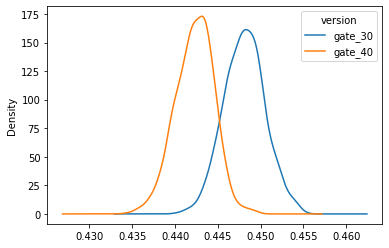

In [17]:
# A kernel density plot of the bootstrap distributions
boot_1d.plot(kind='kde')


In [18]:
# Adding a column with the % difference in AB groups
boot_1d['diff(%)'] = (boot_1d['gate_30']-boot_1d['gate_40'])/boot_1d['gate_40']*100
boot_1d.head()

version,gate_30,gate_40,diff(%)
retention_1,0.445628,0.440821,1.090488
retention_1,0.444903,0.436129,2.011894
retention_1,0.450002,0.437752,2.798468
retention_1,0.448497,0.442687,1.312553
retention_1,0.446894,0.443186,0.836770


<AxesSubplot:ylabel='Density'>

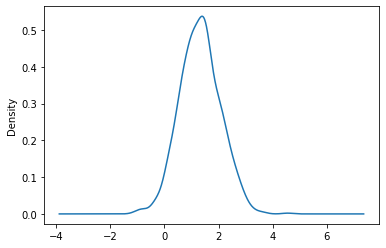

In [19]:
# Ploting the boostraping % difference
boot_1d['diff(%)'].plot(kind='kde')

In [23]:
# Caculate the probability that 1-day retention is greater at A group
prob = (boot_1d['diff(%)']>0).mean()
print('The probability that 1-day retention is greater at A group = {:.2%}'.format(prob))

The probability that 1-day retention is greater at A group = 97.00%


# 7-day retention by A/B group

In [24]:
percentage_7d_AB = data.groupby('version')['retention_7'].mean()
percentage_7d_AB

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

In [26]:
boot_7d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
boot_7d = pd.DataFrame(boot_7d)
boot_7d.head()

version,gate_30,gate_40
retention_7,0.190192,0.180241
retention_7,0.187876,0.181586
retention_7,0.192774,0.182400
retention_7,0.189127,0.184205
retention_7,0.191376,0.184412


<AxesSubplot:ylabel='Density'>

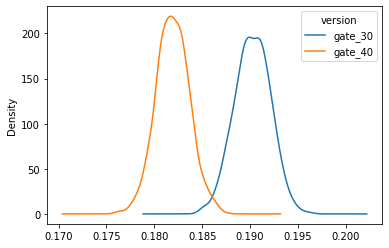

In [27]:
# Ploting a kernel density 
boot_7d.plot(kind='kde')

## Should we be confident in the differences between A/B groups?  

In [30]:
boot_7d['diff(%)'] = (boot_7d['gate_30']-boot_7d['gate_40'])/boot_7d['gate_40']*100
boot_7d.head()

version,gate_30,gate_40,diff(%)
retention_7,0.190192,0.180241,5.520893
retention_7,0.187876,0.181586,3.464344
retention_7,0.192774,0.182400,5.687491
retention_7,0.189127,0.184205,2.671749
retention_7,0.191376,0.184412,3.776334


<AxesSubplot:ylabel='Density'>

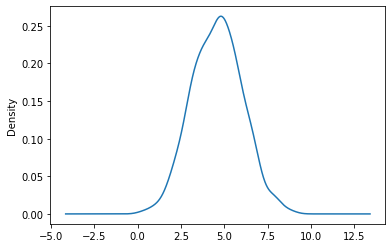

In [33]:
# Ploting the boostraping % difference
boot_7d['diff(%)'].plot(kind='kde')

In [32]:
prob = (boot_7d['diff(%)']>0).mean()
print('The probability that 7-day retention is greater at A group = {:.2%}'.format(prob))

The probability that 7-day retention is greater at A group = 100.00%


# Conclusion

From the result of A/B Testing, both 1-day retention and 7-day retention of this mobile game are higher when the gate is at level 30 than when it is at level 40. Therefore, we could conclude that we shouldn't move the gate from level 30 to level 40 if If we want to keep retention high. (The reason behind this can be explained by The theory of hedonic adaptation.)